In [1]:
import pandas as pd #linear algebra
import numpy as np #data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
glassdf=pd.read_csv('E:/glass/glass.csv') #providing path of file
glassdf.shape

(214, 10)

In [3]:
glassdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# Let's count the number of glasses in each group

pd.value_counts(glassdf['Type'].values.ravel()) 


# It is clear that type 6 has very few data. 
# That's why it is hard to predict glasses in that type.


2    76
1    70
7    29
3    17
5    13
6     9
dtype: int64

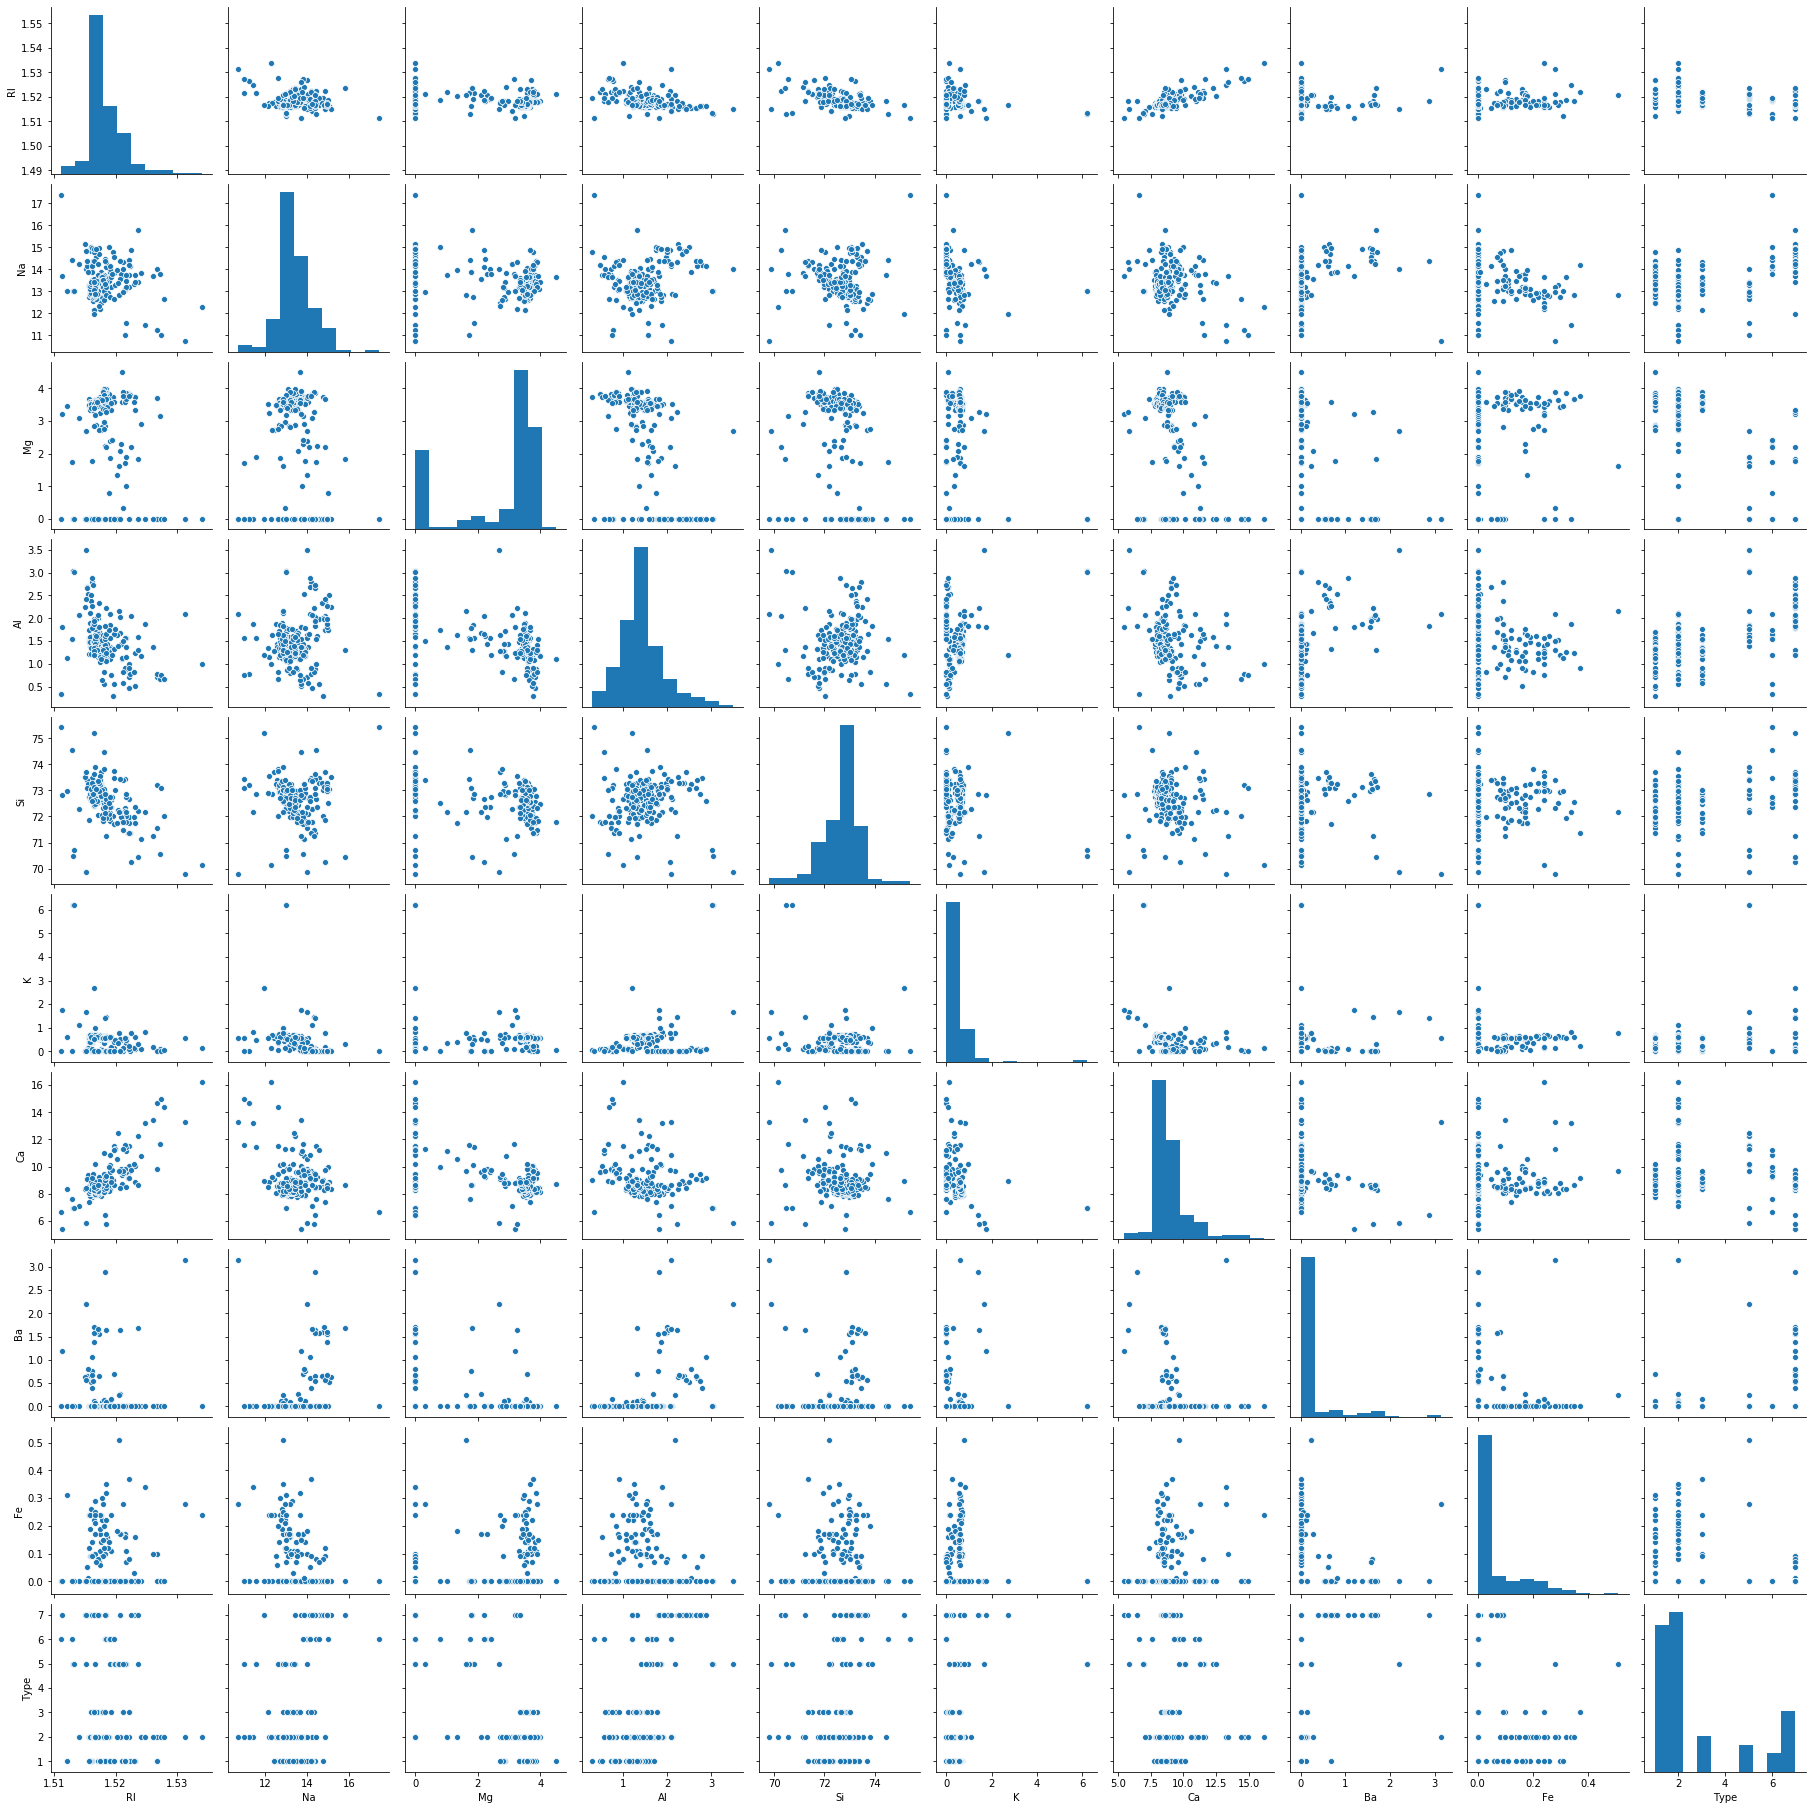

In [6]:
#Check correlation between the variables using Seaborn's pairplot
sns.pairplot(glassdf)

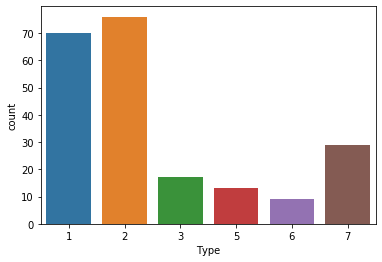

In [7]:
#count of the target variable
sns.countplot(x='Type', data=glassdf)

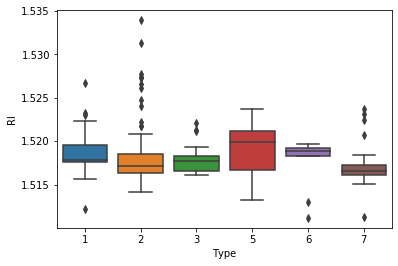

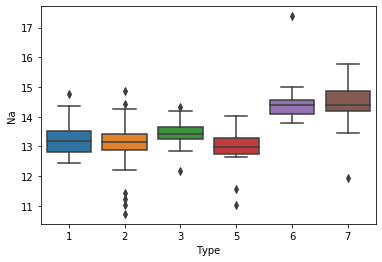

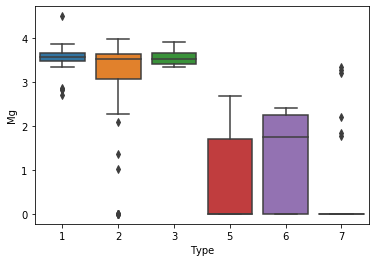

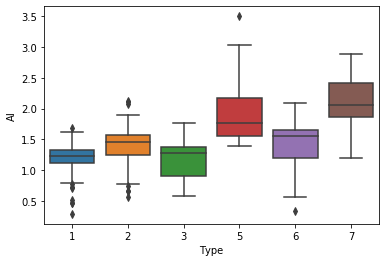

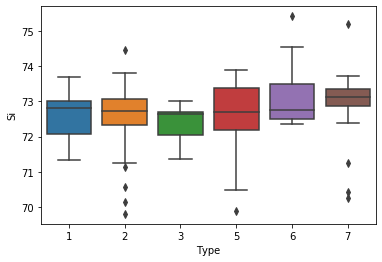

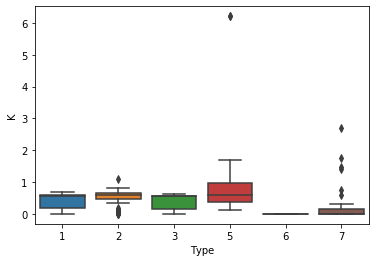

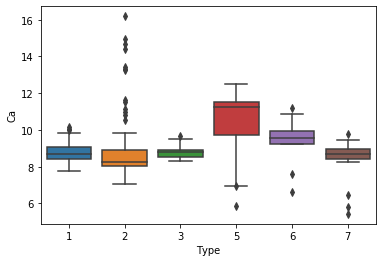

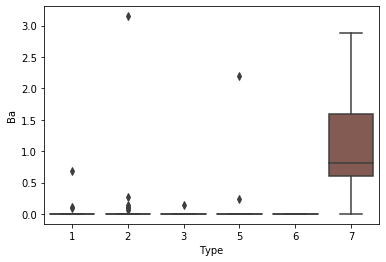

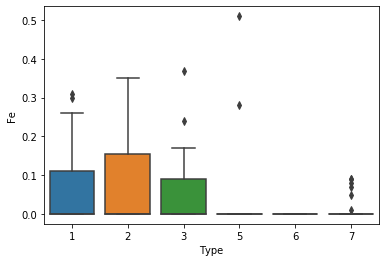

In [8]:
#Plot the Boxplot to check for outliers
#We are going to plot a boxplot for each column against target variable
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = glassdf.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    px = sns.boxplot(x='Type', y=feature_names[i], data=glassdf)


In [9]:
# The diamond shaped dots outside the boxplot indicates the outliers 
# There are some extreme cases in K, Ba and Fe. 
# That why it is necessary to rule out the outliers 

df = glassdf.copy(deep=True) # Make a copy of original data, just in case

In [10]:
glassdf.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
# Create new dataframe for each type

types = df['Type'].unique()
d = {type: df[df['Type'] == type] for type in types}

d[1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,1
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1


In [12]:
# Set the quantile

low = .25
high = .75

bounds = {}
for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'Type'] # Remove 'Type' Column
    quant_df = filt_df.quantile([low, high])
    IQR = quant_df.iloc[1,:]-  quant_df.iloc[0,:]
    quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5*IQR
    quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5*IQR
    bounds[type] = quant_df
    
bounds[1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0.25,1.51451,11.775,3.21375,0.79,70.67375,-0.385,7.49625,0.0,-0.165
0.75,1.52259,14.575,3.92375,1.65,74.42375,1.175,9.98625,0.0,0.275


In [13]:
# Define our new dataset by removing the outliers 

filt_df = d[1].loc[:, d[1].columns != 'Type'] # Remove 'Type' Column
filt_df = filt_df.apply(lambda x: x[(x>bounds[1].loc[low,x.name]) & (x < bounds[1].loc[high,x.name])], axis=0)
filt_df = pd.concat([filt_df,d[1].loc[:,'Type']], axis=1)

filt_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,NaN,1.10,71.78,0.06,8.75,NaN,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,NaN,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,0.00,1
...,...,...,...,...,...,...,...,...,...,...
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,NaN,0.00,1
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,NaN,0.17,1
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,NaN,0.17,1
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,NaN,0.16,1


In [14]:
# Let's remove the outliers from the dataset 
df_new = {}

for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'Type'] # Remove 'Type' Column
    filt_df = filt_df.apply(lambda x: x[(x>bounds[type].loc[low,x.name]) & (x < bounds[type].loc[high,x.name])], axis=0)
    df_new[type] = pd.concat([filt_df,d[type].loc[:,'Type']], axis=1)


glassdata_new = result = pd.concat(df_new)
glassdata_new

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
1 0    1.52101  13.64   NaN  1.10  71.78  0.06  8.75   NaN  0.0     1
  1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83   NaN  0.0     1
  2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78   NaN  0.0     1
  3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22   NaN  0.0     1
  4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07   NaN  0.0     1
...        ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
7 209  1.51623  14.14   NaN  2.88  72.61  0.08  9.18  1.06  NaN     7
  210  1.51685  14.92   NaN  1.99  73.06  0.00  8.40  1.59  NaN     7
  211      NaN  14.36   NaN  2.02  73.42  0.00  8.44  1.64  NaN     7
  212  1.51651  14.38   NaN  1.94  73.61  0.00  8.48  1.57  NaN     7
  213  1.51711  14.23   NaN  2.08  73.36  0.00  8.62  1.67  NaN     7

[214 rows x 10 columns]

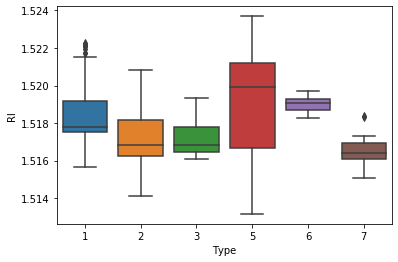

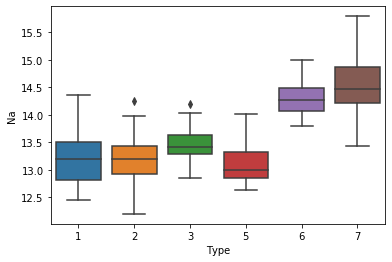

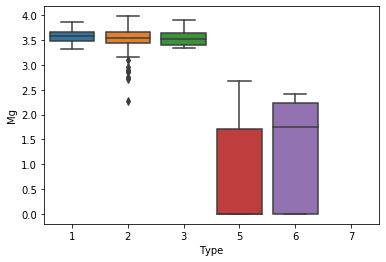

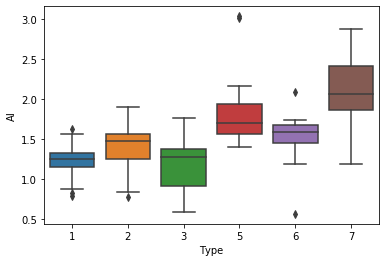

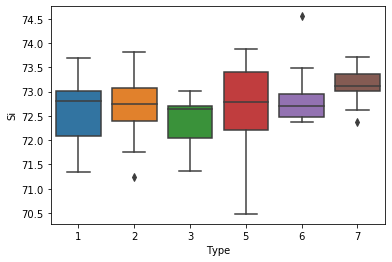

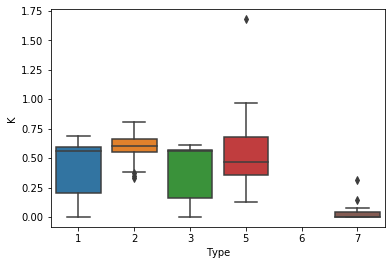

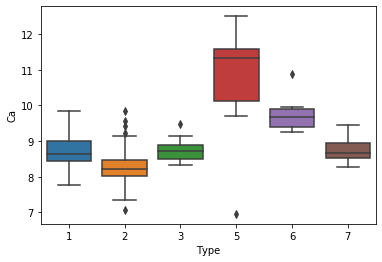

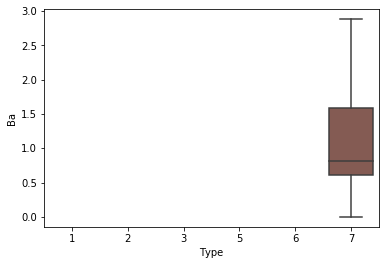

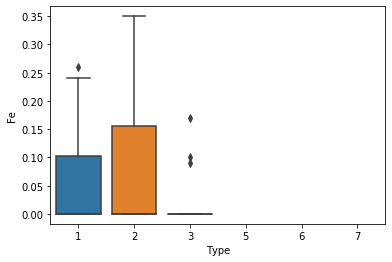

In [15]:
# Now we have our glass data that has all outliers removed
# Check out the boxplot again

for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Type', y=feature_names[i], data=glassdata_new)

In [16]:
# There is some great information. 
# 1. Type 7 vanished in Mg 
# 2. Type 6 vanished in K

# This two important messages can help us classify Type 6 and 7! 
# We do not need to worry about the small data for these two types. 

# Check the original data 

glassdf[glassdf['Type'] == 6]

# Like what we expected all K are 0. That the character for 6. 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
180,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6
183,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.0,6.65,0.0,0.0,6


In [56]:
glass_data[glass_data['Type'] == 7]

# There are few has nonzero Mg in Type 7, but most of them has 0. 


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Target
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7,2
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7,2
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7,2
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7,2
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7,2
190,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7,2
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7,2
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,2
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7,2
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7,2


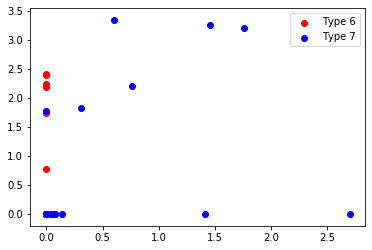

In [17]:
# Now let's plot type 6 and 7 using Mg and K


x_6 = glassdf[glassdf['Type']==6]['K']
y_6 = glassdf[glassdf['Type']==6]['Mg']
plt.scatter(x_6,y_6, color = 'red', label = "Type 6")

x_7 = glassdf[glassdf['Type']==7]['K']
y_7 = glassdf[glassdf['Type']==7]['Mg']
plt.scatter(x_7,y_7, color = 'blue', label = "Type 7")

plt.legend()
plt.show()

In [18]:
# From the picture above, it is easy to see, except for one outlier in Type 6 (right top corner)
# The rest are fairly easy to distinguish between 6 and 7. 

# Let's just use Mg and K for SVM

# Now let's separate the data in to training and test data

alpha = 0.7 # training data ratio

# Splitting glassdata to training and test data
train = pd.DataFrame()
test = pd.DataFrame()
for i in range(len(types)):
    tempt = glassdata_new[glassdata_new.Type == types[i]]
    train = train.append(tempt[0:int(alpha*len(tempt))])
    test = test.append(tempt[int(alpha*len(tempt)): len(tempt)])
    # test.append(tempt[int(alpha*len(tempt)): len(tempt)])

# Check whether the dimension match
print (train.shape, test.shape, glassdf.shape)

(148, 10) (66, 10) (214, 10)


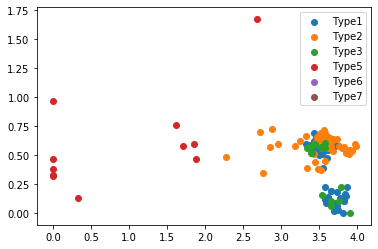

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

for type in types:
    x = glassdata_new[glassdata_new['Type'] == type]['Mg']
    y = glassdata_new[glassdata_new['Type'] == type]['K']
    ax.scatter(x,y,label = "Type" + str(type))

plt.legend()
plt.show()

In [21]:
#Create an empty list called traget
target = []
for i in glassdf['Type']:
    if i >= 1 and i <= 4:
        target.append('1')
    elif i >= 5 and i <= 7:
        target.append('2')
glassdf['Target'] = target


In [23]:
glassdf['Target'].unique()

array(['1', '2'], dtype=object)

In [26]:
glassdf.drop(['Type'],axis=1,inplace =True)
glassdf.shape

(214, 10)

In [27]:
x= glassdf.iloc[:,:9]
y = glassdf['Target']

In [28]:
x.shape

(214, 9)

In [29]:
#Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=2018)

In [31]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [32]:
#SVM with GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [33]:
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], 'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]} 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
                
# Train the classifier
clf_grid.fit(x_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 1.3, 'gamma': 0.1}
Best Estimators:
 SVC(C=1.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.4s finished


In [34]:
model = svm.SVC(kernel='rbf', C = 0.9, gamma=0.1)

In [35]:
model.fit(x_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_pred=model.predict(x_test)

In [37]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[37  3]
 [ 1 13]]
92.5925925925926
